#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recommended formatting settings

In [2]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)


## Loading the dataset

In [3]:
'''
#Google colab version
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]
'''

'\n#Google colab version\n!rm *.csv\n\nfrom google.colab import files\nprint("Please load the raw csv data")\nuploadedData = files.upload()\nfilename = list(uploadedData)[0]\n'

In [4]:
#Local machine version

filename = "virus_data.csv"


In [5]:
dataset = pd.read_csv(filename)

In [6]:
dataset.shape

(1250, 25)

Q2 - print the value_counts of converstaions_per_day

In [7]:
dataset.conversations_per_day.value_counts()


conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

(Q4)	Split the data randomly into a training set (80% of the data) and a test set (20% of the data)

In [8]:
from sklearn.model_selection import train_test_split
sum_of_last_2_digits_IDS=67
train_set , test_set = train_test_split(dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

(Q5)	For both the training set and test set, report which fields have missing values and how many missing values there are. You can use Panda's function isnull().

In [9]:
pd.isnull(train_set).sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         85
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [10]:
pd.isnull(test_set).sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         24
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

Q6 (Q6)	Plot a histogram (see Tutorial 01) for each field where you found missing values in (Q5). Add these plots to your report. Answer: Can you recognize outliers?
Reminder: Create plots using only the training set.


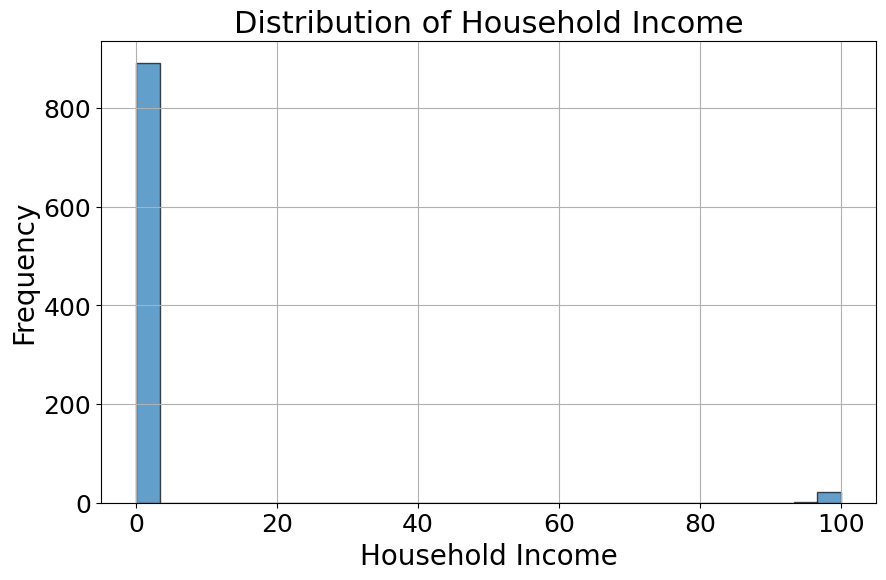

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(train_set['household_income'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(Q7)	For each field where you found missing values, calculate the median and the mean in the training set, and report it. 
If there is a significant difference between the mean and median values, explain the reason. Which filling method do you prefer to use in our case, and why?


In [12]:
print ("the mean of the household income is: ", train_set['household_income'].mean()," and the median is: ", train_set['household_income'].median())

the mean of the household income is:  3.209617486338798  and the median is:  0.7



Task A: Use the method you chose to fill the missing values in both training and test sets. You can use Panda's function fillna().


In [13]:
household_income_median = train_set['household_income'].median()
train_set['household_income'].fillna(household_income_median, inplace=True)
test_set['household_income'].fillna(household_income_median, inplace=True)

C:\Users\t-darnissan\AppData\Local\Temp\ipykernel_25176\2011953623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['household_income'].fillna(household_income_median, inplace=True)
C:\Users\t-darnissan\AppData\Local\Temp\ipykernel_25176\2011953623.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

Our medical experts suspect that it is possible to predict the spread using a pair of PCR features from the set: {PCR_04 , PCR_07 , PCR_09}.
Task B: For each possible pair from this set, create a seaborn.pairplot of the two aforementioned PCR features. Use the hue parameter to color the different (train) data points according to their spread. 


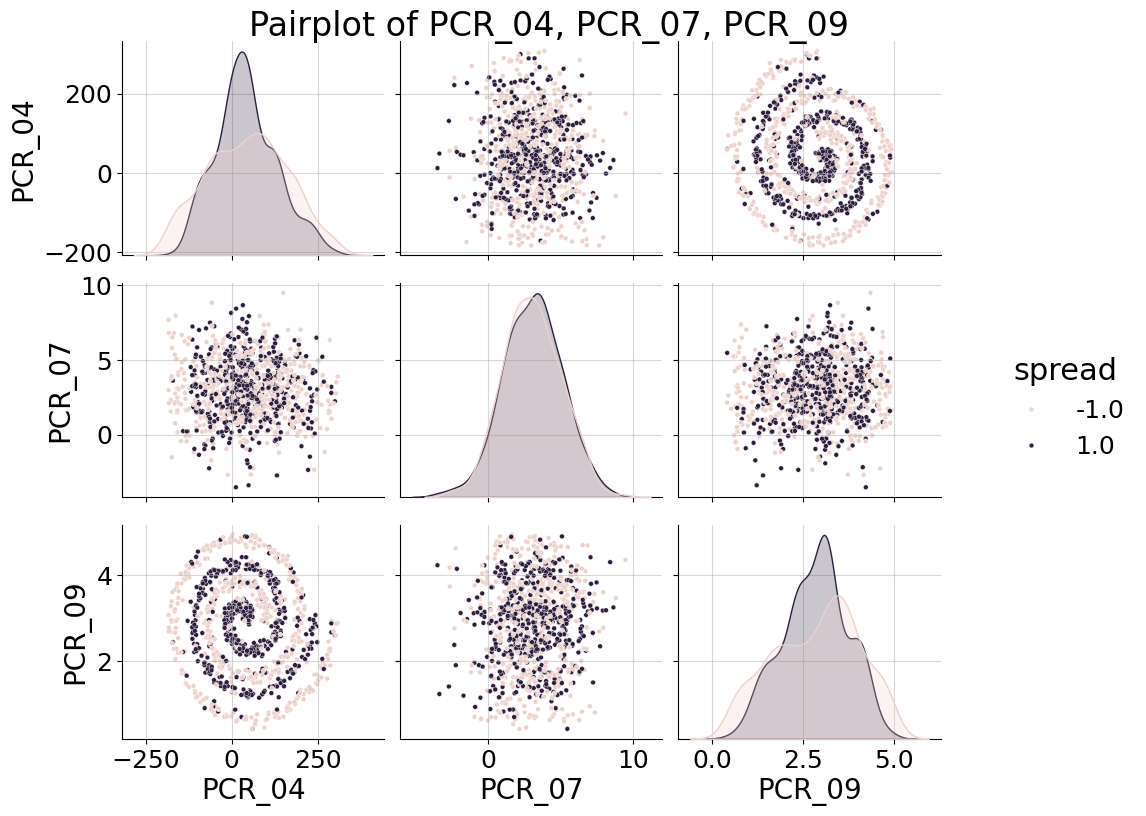

In [14]:
g=sns.pairplot(train_set,vars=['PCR_04','PCR_07','PCR_09'],hue='spread',plot_kws={"s":12})
g.fig.suptitle("Pairplot of PCR_04, PCR_07, PCR_09", y=1.02)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)


Task D: Create a temporary DataFrame by taking only the two features you chose on ‎(Q8)  from the training set. Train a 1-NN model (with k=1) on this subset to fit the spread label. Use the provided visualize_clf function to visualize the decision regions of the model (send only the training set to this function, so that only the training examples will be scattered on the plot). 
Compute the training accuracy and test accuracy of the model by calling its 
score method, e.g., call h.score(Xtrain, Ytrain).

Make sure that all labels in your notebook (the ones in the dataset and the ones your model return) are ±1, and not {0,1} or {True,False}.


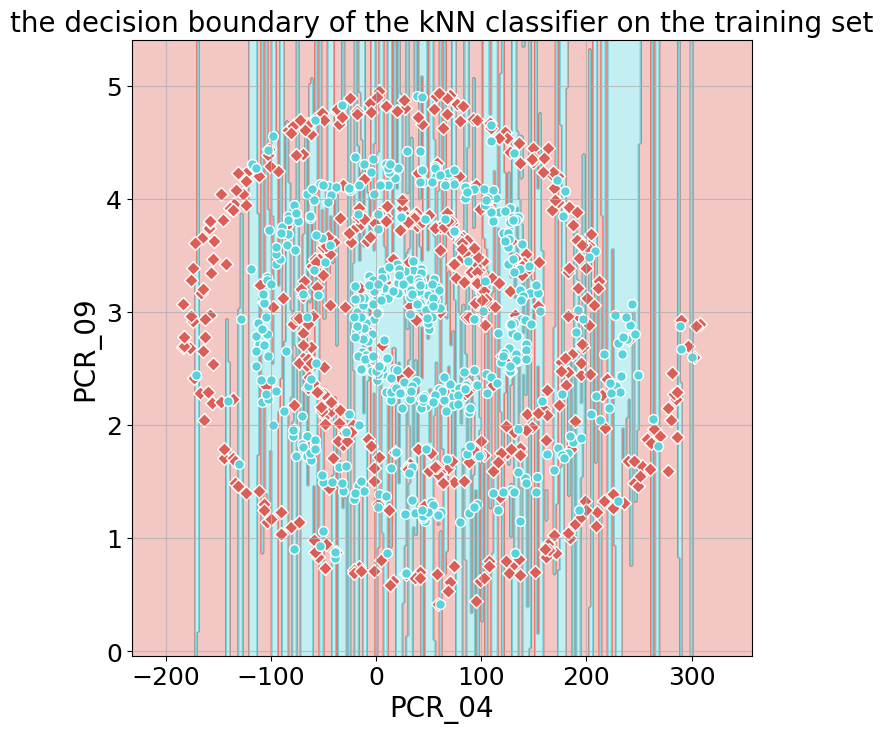

In [15]:
import knn
import visualize_clf
X_train = train_set[['PCR_04','PCR_09']]
Y_train = train_set.spread
X_test = test_set[['PCR_04','PCR_09']]
Y_test = test_set.spread
clf= knn.kNN(1)
clf.fit(X_train,Y_train)
visualize_clf.visualize_clf(clf,X_train,Y_train,"the decision boundary of the kNN classifier on the training set","PCR_04","PCR_09")

In [16]:
print("the accuracy of the classifier on the training set is: ",clf.score(X_train,Y_train))
print ("the accuracy of the classifier on the test set is: ",clf.score(X_test,Y_test))

the accuracy of the classifier on the training set is:  1.0
the accuracy of the classifier on the test set is:  0.572


In [17]:
print ("verifying labels range -1 and 1")
print (Y_train)
print ("---------------------------------")
print (Y_test)


verifying labels range -1 and 1
706    -1.0
870    -1.0
211     1.0
1062    1.0
96     -1.0
       ... 
905    -1.0
985    -1.0
7       1.0
821    -1.0
835    -1.0
Name: spread, Length: 1000, dtype: float64
---------------------------------
648    -1.0
1024   -1.0
657    -1.0
1036    1.0
889     1.0
       ... 
393    -1.0
34      1.0
391    -1.0
691     1.0
711    -1.0
Name: spread, Length: 250, dtype: float64


Q11	Use min-max scaling (between [-1,1]) to normalize the two features in the temporary DataFrame you created before, and train a new kNN model (k=1) on the normalized dataset.
Compute the new training and test accuracies and draw the decision regions of the model. Attach the results to your report and compare them to those from ‎(Q10) for the same k=1 model on the raw data. Use these results to explain why normalization is important for nearest neighbor models.


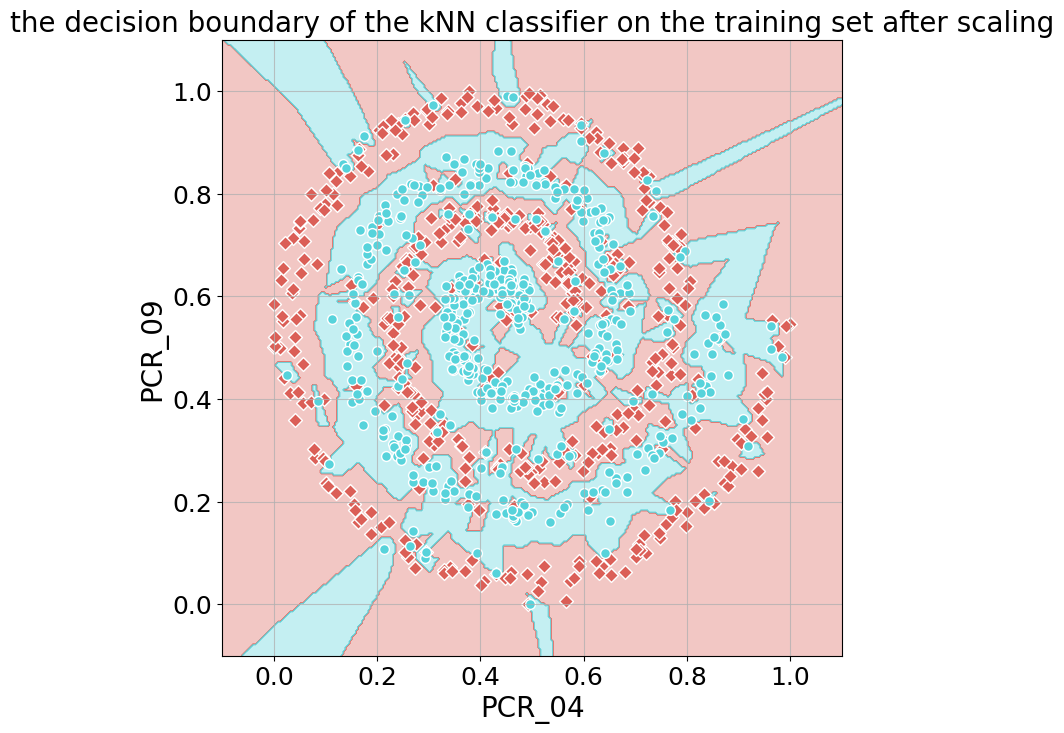

In [18]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train = Y_train.values
Y_test = Y_test.values
clf_scaled= knn.kNN(1)
clf_scaled.fit(X_train_scaled,Y_train)
visualize_clf.visualize_clf(clf_scaled,X_train_scaled,Y_train,"the decision boundary of the kNN classifier on the training set after scaling","PCR_04","PCR_09")



In [19]:
print ("the accuracy of the classifier on the training set after scaling is: ",clf_scaled.score(X_train_scaled,Y_train))
print ("the accuracy of the classifier on the test set after scaling is: ",clf_scaled.score(X_test_scaled,Y_test))


the accuracy of the classifier on the training set after scaling is:  1.0
the accuracy of the classifier on the test set after scaling is:  0.768



Q12	Using the normalized dataset, train another kNN model with k= 5. Compute the training and test accuracy and draw the decision regions of this model. 
Attach the results to your report and compare them to those from ‎(Q11). 
Use these results to briefly explain the effect of k on the decision regions.


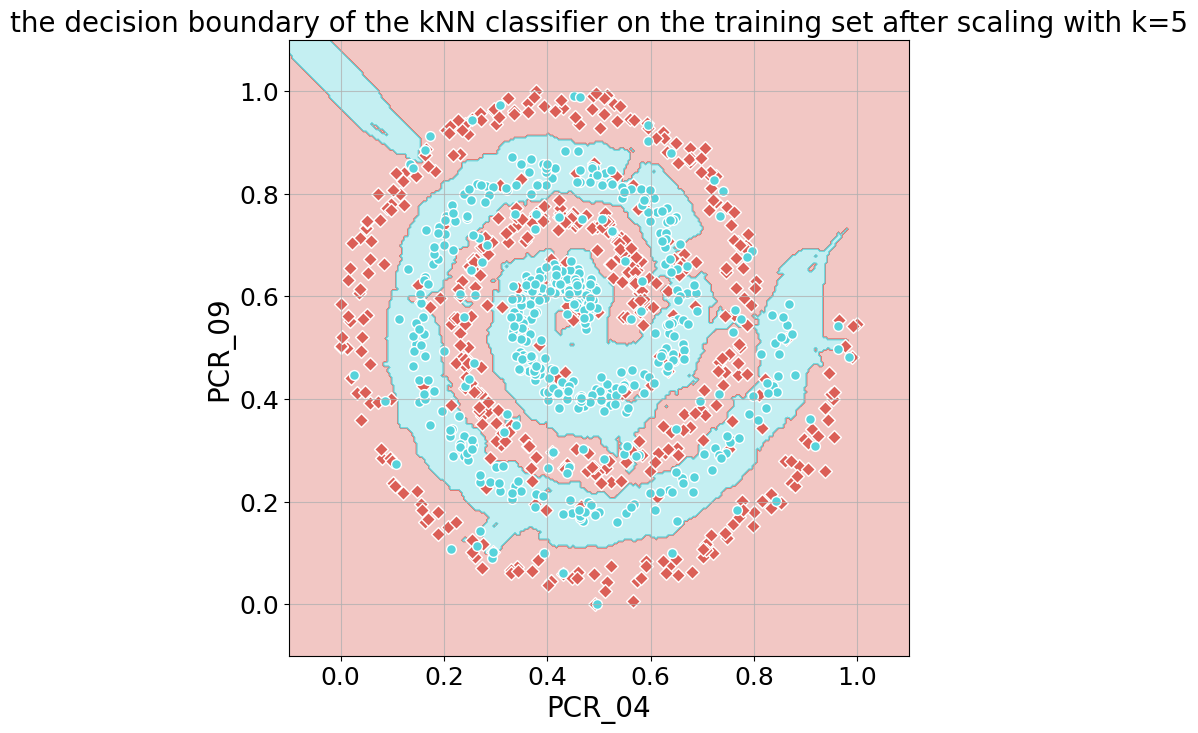

In [20]:
clf_scaled_5= knn.kNN(5)
clf_scaled_5.fit(X_train_scaled,Y_train)
visualize_clf.visualize_clf(clf_scaled_5,X_train_scaled,Y_train,"the decision boundary of the kNN classifier on the training set after scaling with k=5","PCR_04","PCR_09")


In [21]:
print ("the accuracy of the classifier on the training set after scaling with k=5 is: ",clf_scaled_5.score(X_train_scaled,Y_train))
print ("the accuracy of the classifier on the test set after scaling with k=5 is: ",clf_scaled_5.score(X_test_scaled,Y_test))


the accuracy of the classifier on the training set after scaling with k=5 is:  0.854
the accuracy of the classifier on the test set after scaling with k=5 is:  0.82


Our medical experts suggest that blood types affect the risk target variable. They propose merging blood types into two groups: {O+, B+} and {O-, A-, A+, B-, AB+, AB-}. That is, instead of having a separate Boolean feature for each blood type, we would have one Boolean feature for these groups.

Task E: According to the suggested groups, create a new Boolean feature called SpecialProperty in your DataFrame, indicating whether the specific data point has a blood type in {O+, B+} or not. Then, remove the original blood_type feature from the DataFrame.

Technical: You can use the following snippet as a starting point to create a Boolean series according to a subset of the values of a feature:
df["blood_type"].isin(["O+", "B+"])


In [22]:
train_set['SpecialProperty'] = train_set['blood_type'].isin(['O+', 'B+'])
train_set.drop(columns=['blood_type'], inplace=True)
print(train_set['SpecialProperty'].value_counts())

SpecialProperty
False    518
True     482
Name: count, dtype: int64


Univariate Analysis
You will now carry out most of the univariate analysis in your notebook (or IDE). 
You should not add all the plots to the report, only the ones we specifically request.
	
For every numerical feature (including extracted ones), plot two histograms, one for each target variable (risk and spread), using hue to split by the target variable's value (e.g., high/low spread value). For continuous/ordinal features you should use the kde keyword to draw the estimated distribution curve (see Tutorial 01).


The following code snippet generates a 2-column figure of histograms of the features in the COL_NAME list. You may use this as a template to generate meaningful plots.
Refer to the seaborn documentation to understand more on histplot’s keyword arguments.





COL_NAME = ['PCR_01', 'num_of_siblings']
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(5 * COLS, 4 * ROWS)) 
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
        
    isContinuous = "float" in df[column].dtype.name
    sns.histplot(data=df, x=column, hue=cls, line_kws={"linewidth": 3}, 
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)

plt.tight_layout()

To clarify: in your jupyter notebook you should generate 2 histograms for every feature. 
Each histogram corresponds to one target feature (risk, spread), where the different labels are counted separately and colored differently. Continuous variable histograms should also have estimated distribution curves (using the kde argument).


In [23]:
# add every feature to the list below that you want to visualize
COL_NAME = [train_set.columns[i] for i in range(len(train_set.columns)) if train_set.columns[i] not in ["risk", "spread"]]
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(15 * COLS, 12 * ROWS)) 
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
        
    isContinuous = "float" in train_set[column].dtype.name
    sns.histplot(data=train_set, x=column, hue=cls, line_kws={"linewidth": 3}, 
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)

plt.tight_layout()


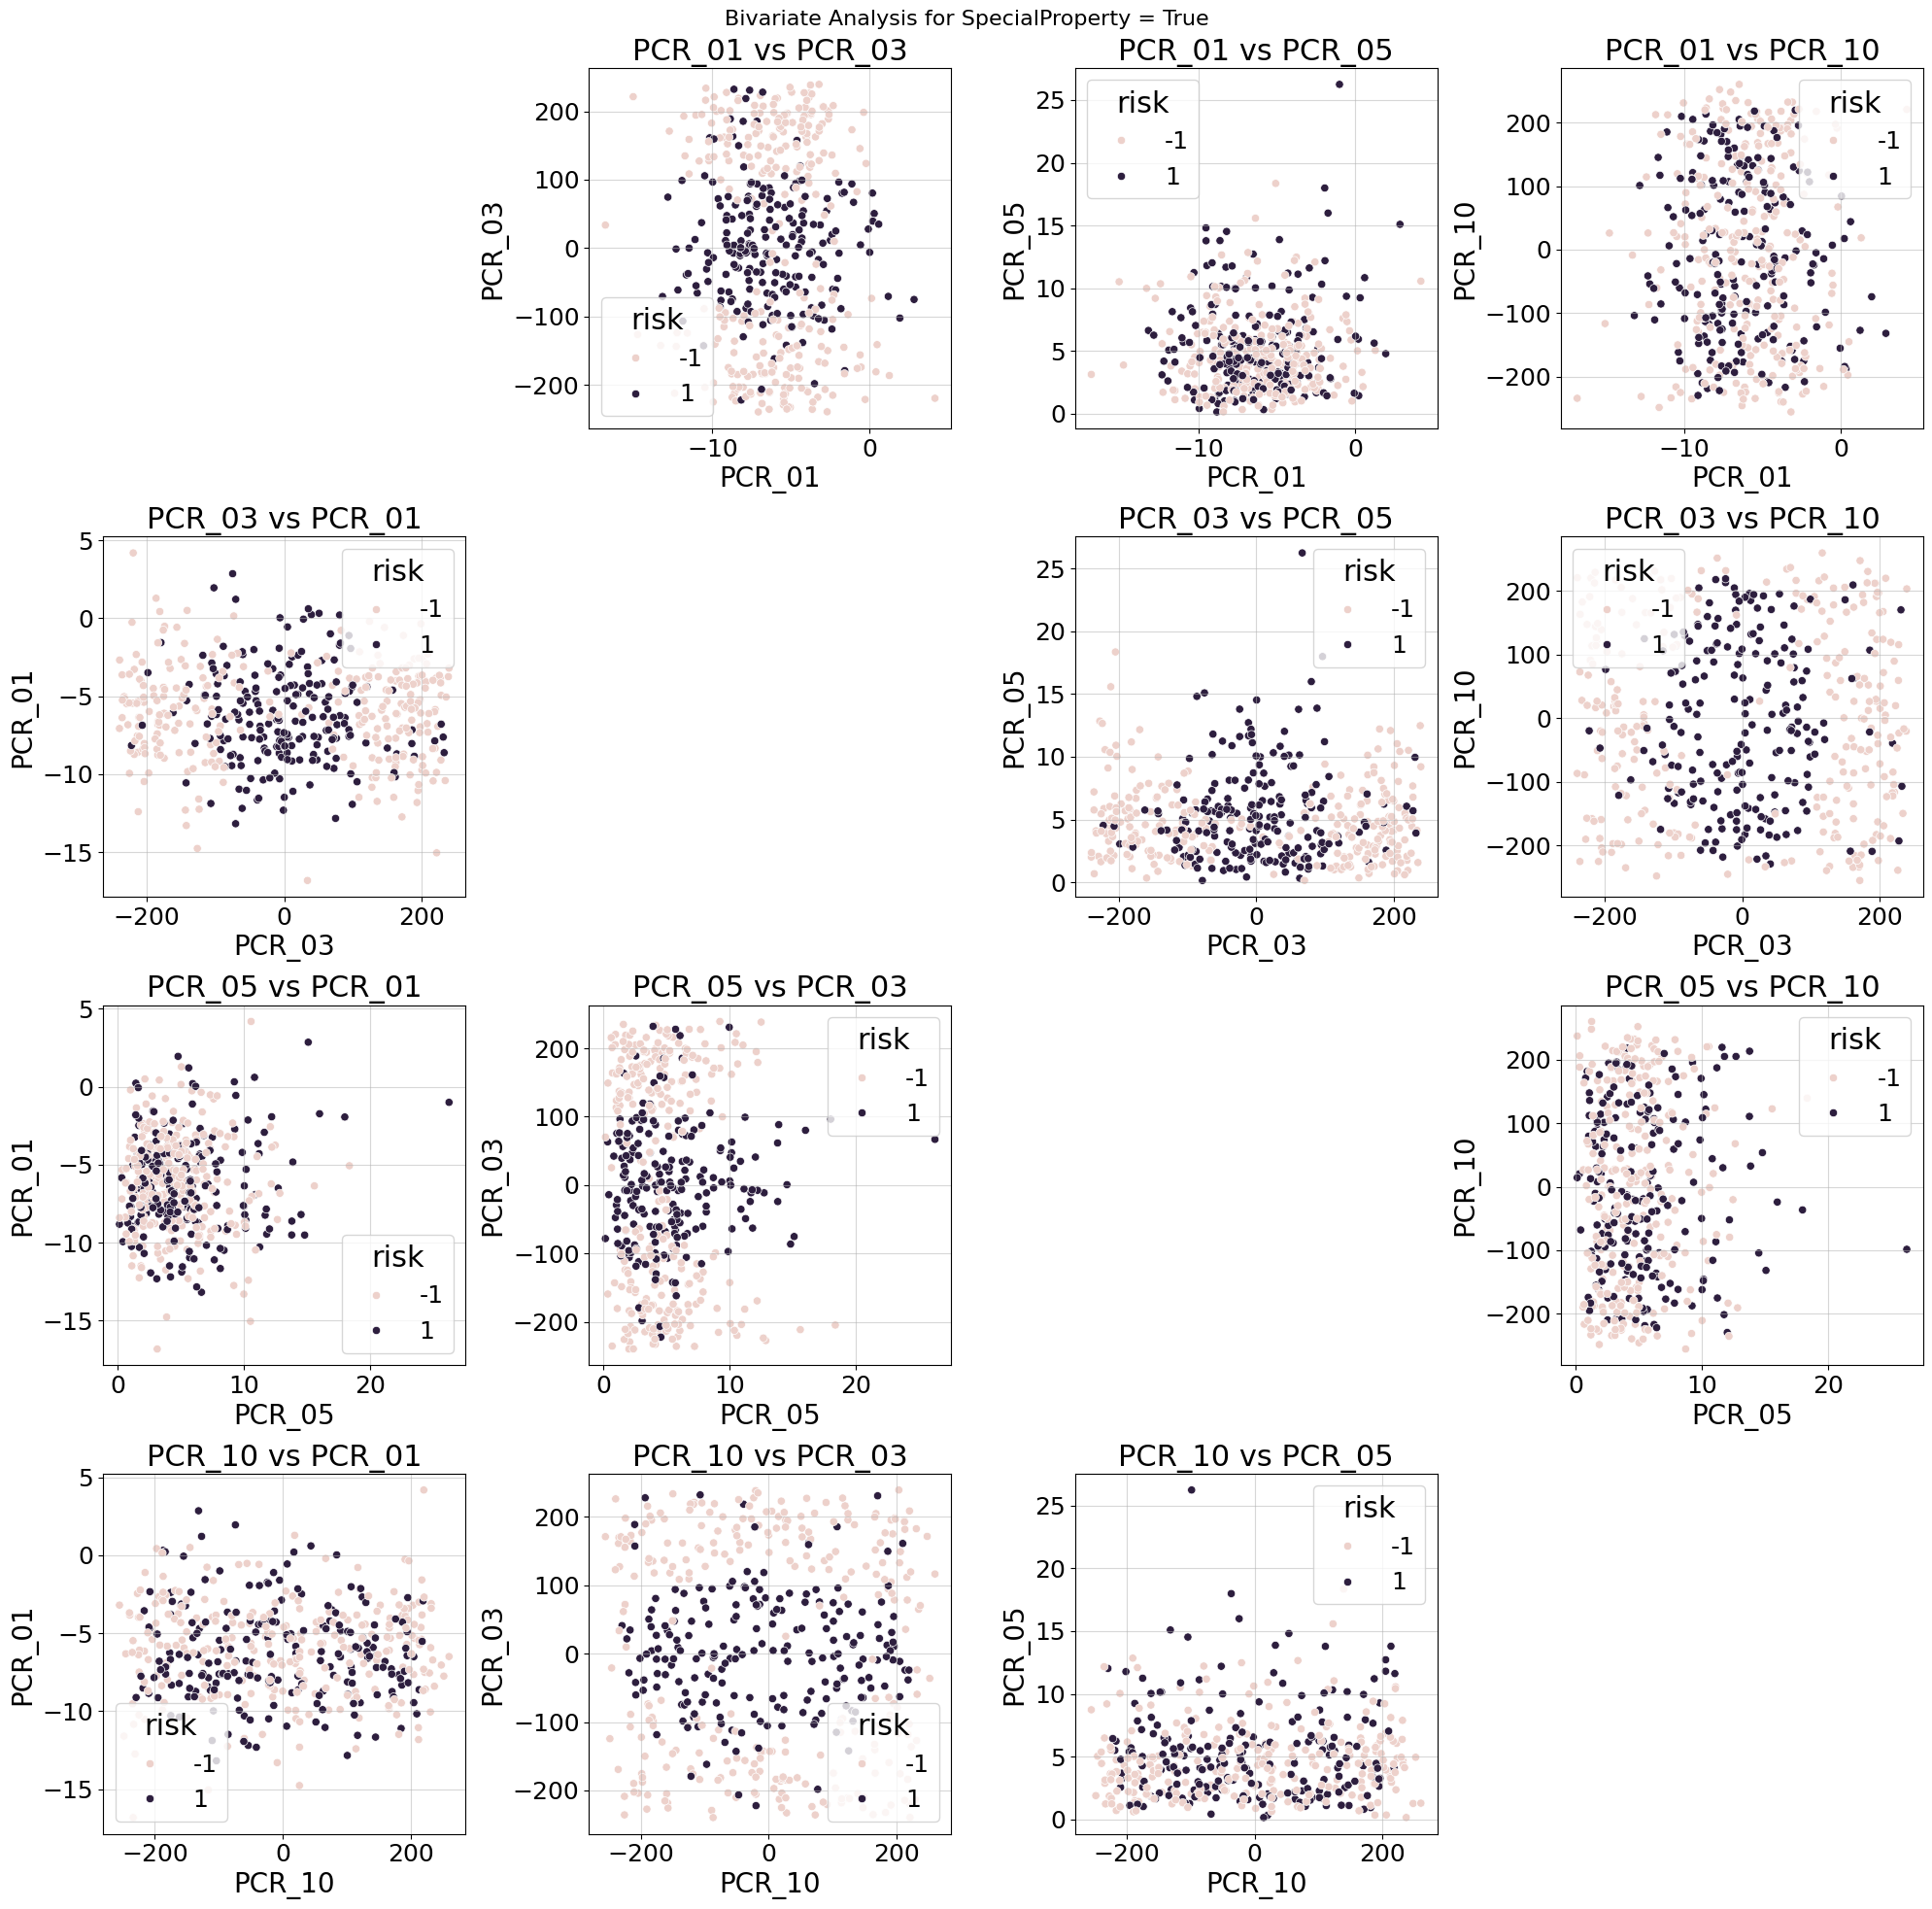

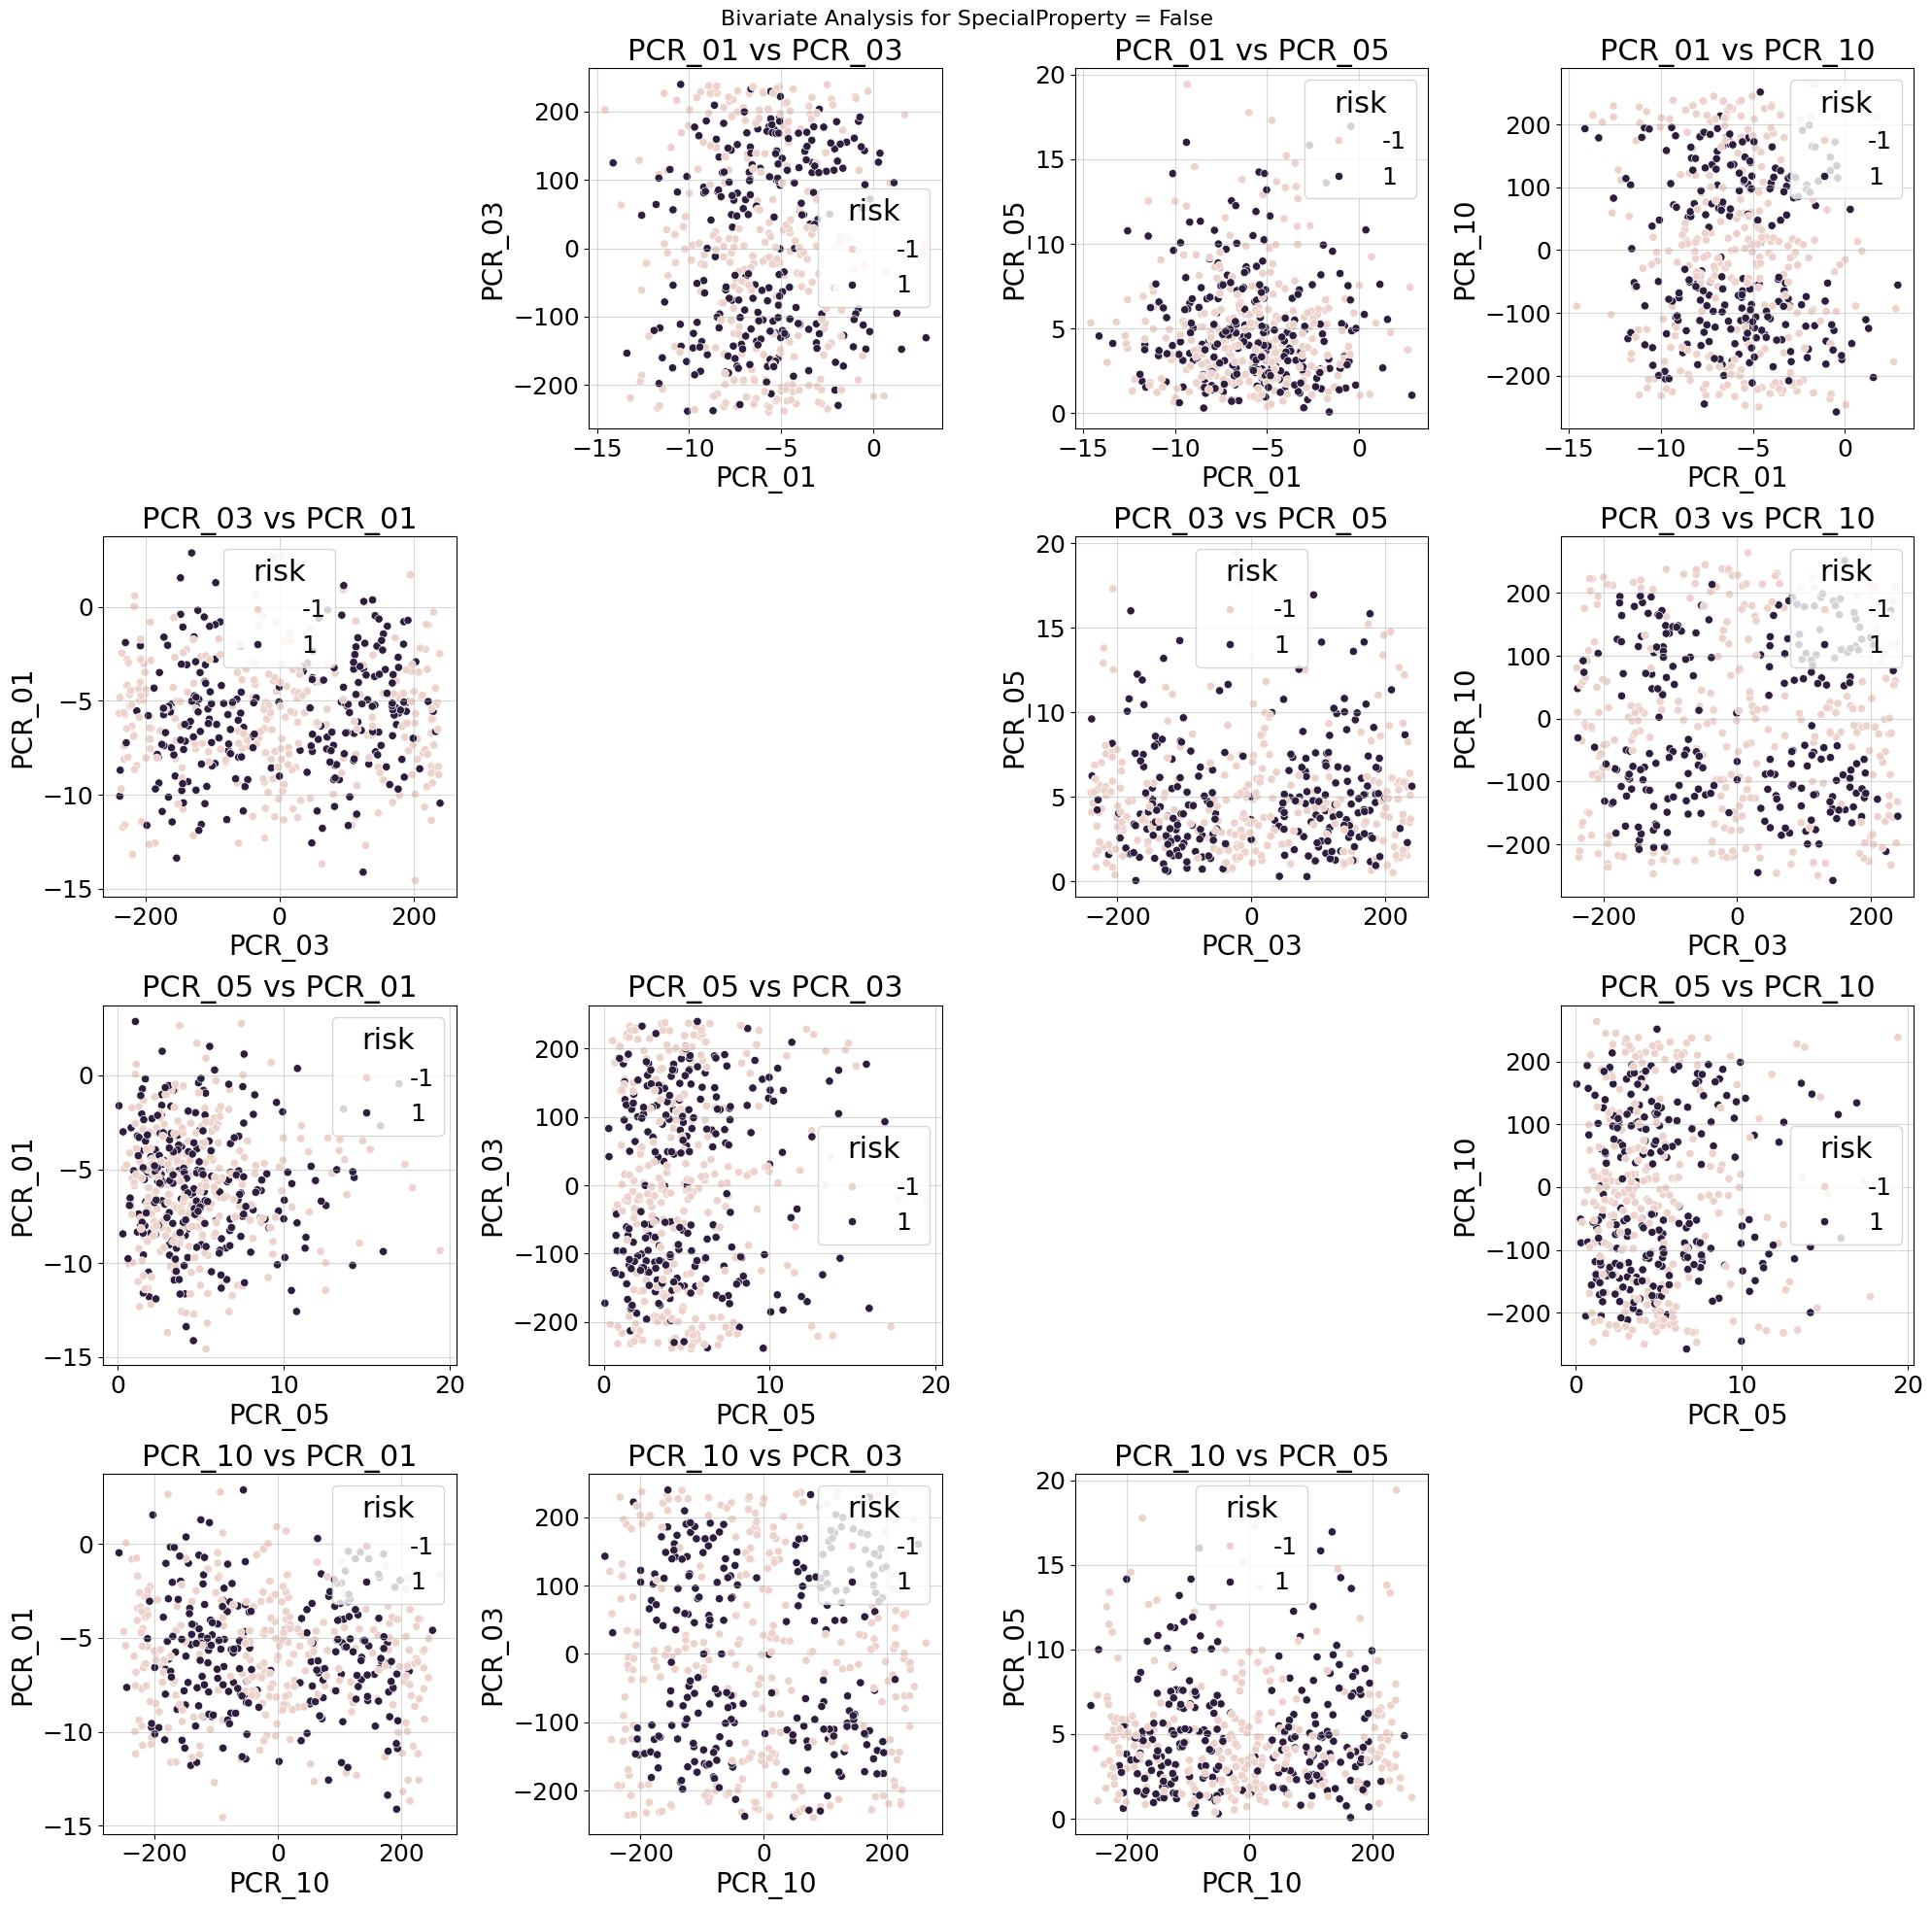

In [24]:
PCR_features = ['PCR_01', 'PCR_03', 'PCR_05', 'PCR_10']
COLS, ROWS = len(PCR_features), len(PCR_features)

# Function to create a matrix of pair plots for a given subset of data
def plot_bivariate_analysis(df_subset, title):
    plt.figure(figsize=(5 * COLS, 5 * ROWS))
    for row in range(ROWS):
        for col in range(COLS):
            if row == col:
                continue  # Skip the diagonal
            plt.subplot(ROWS, COLS, row * COLS + col + 1)
            sns.scatterplot(data=df_subset, x=PCR_features[row], y=PCR_features[col], hue='risk')
            plt.grid(alpha=0.5)
            plt.title(f'{PCR_features[row]} vs {PCR_features[col]}')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Split the data based on SpecialProperty
df_true = train_set[train_set['SpecialProperty'] == True]
df_false = train_set[train_set['SpecialProperty'] == False]

# Perform bivariate analysis for each subset
plot_bivariate_analysis(df_true, 'Bivariate Analysis for SpecialProperty = True')
plot_bivariate_analysis(df_false, 'Bivariate Analysis for SpecialProperty = False')


<Figure size 1000x600 with 0 Axes>

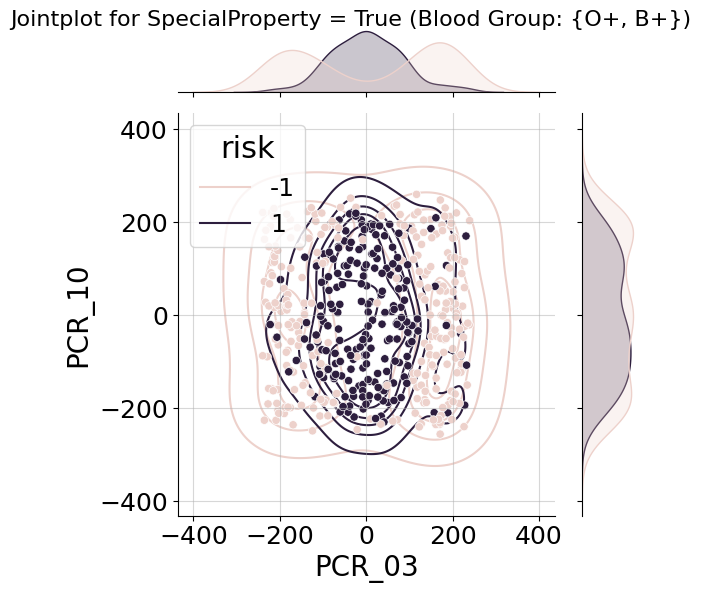

<Figure size 1000x600 with 0 Axes>

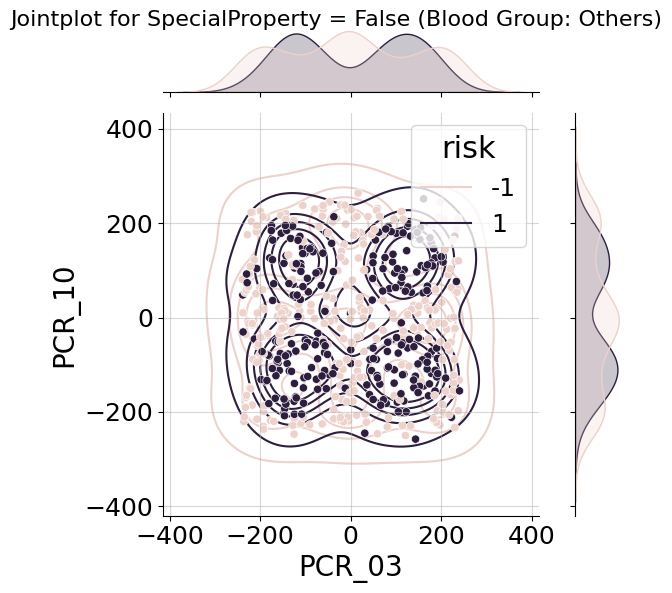

<Figure size 1000x600 with 0 Axes>

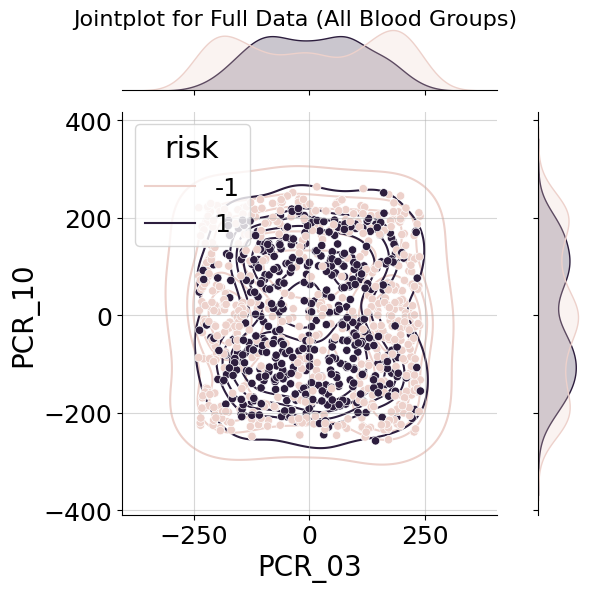

In [25]:
chosen_features = ['PCR_03', 'PCR_10']
def create_jointplot(data, title):
    sns.jointplot(
        data=data, 
        x=chosen_features[0], 
        y=chosen_features[1], 
        hue='risk', 
        kind='scatter'
    ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    plt.suptitle(title, fontsize=16)
    plt.xlabel(chosen_features[0])
    plt.ylabel(chosen_features[1])
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

# Jointplot for the first blood group (SpecialProperty = True)
plt.figure(figsize=(10, 6))
create_jointplot(df_true, 'Jointplot for SpecialProperty = True (Blood Group: {O+, B+})')
plt.show()

# Jointplot for the second blood group (SpecialProperty = False)
plt.figure(figsize=(10, 6))
create_jointplot(df_false, 'Jointplot for SpecialProperty = False (Blood Group: Others)')
plt.show()

# Jointplot for the full data
plt.figure(figsize=(10, 6))
create_jointplot(train_set, 'Jointplot for Full Data (All Blood Groups)')
plt.show()

The risk target feature
The following snippet demonstrates a call to the provided plot3d function:
 

(Q18)	Use the provided function plot3d to plot the pair of PCR features you chose (axes X and Z) and the SpecialProperty feature (axis Y), colored by the risk label. Make sure that the plot is clear & readable and that it has a proper title. Attach the plot to your report.


In [31]:

import seaborn as sns

def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

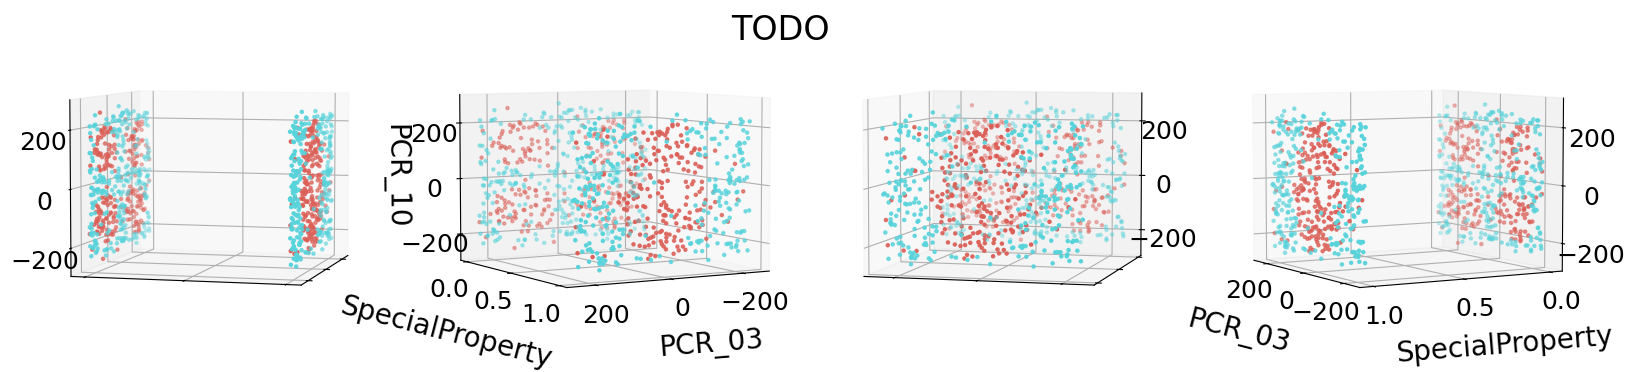

In [27]:

plot3d(train_set, "PCR_03", "SpecialProperty", "PCR_10", title="TODO", hue="risk", s=5)

Part 5: More Data Normalization
We will now complete the normalization process for all the PCR features. 

Task F: Use the univariate analysis above to choose an appropriate normalization method (see Part 2) for every PCR feature in your DataFrame. Accordingly, apply sklearn’s StandardScaler and MinMaxScaler to those features.
In ‎(Q23) you are asked to specify the normalization method you chose for each feature.
Hint: Think about ‎(Q13) when deciding which scaler to use for each feature.

In [35]:
import sklearn
PCR_features_TO_STANDARD_SCALE=['PCR_01','PCR_02','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09']
PCR_features_TO_MINIMAX_SCALE=['PCR_03','PCR_10']
standart_scaler = sklearn.preprocessing.StandardScaler()
minimax_scaler = sklearn.preprocessing.MinMaxScaler()
train_set[PCR_features_TO_STANDARD_SCALE] = standart_scaler.fit_transform(train_set[PCR_features_TO_STANDARD_SCALE])
train_set[PCR_features_TO_MINIMAX_SCALE] = minimax_scaler.fit_transform(train_set[PCR_features_TO_MINIMAX_SCALE])
test_set[PCR_features_TO_STANDARD_SCALE] = standart_scaler.transform(test_set[PCR_features_TO_STANDARD_SCALE])
test_set[PCR_features_TO_MINIMAX_SCALE] = minimax_scaler.transform(test_set[PCR_features_TO_MINIMAX_SCALE])
train_set.columns


Index(['patient_id', 'age', 'sex', 'weight', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk', 'SpecialProperty'],
      dtype='object')

# How to download from Colab?

In [28]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

ModuleNotFoundError: No module named 'google'